# Data Selection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import files

In [ ]:
import zipfile
import os

In [ ]:
uploaded = files.upload()

Saving Customer Segmentation.zip to Customer Segmentation (1).zip


In [ ]:

zip_file_name = 'Customer Segmentation.zip'

extract_dir = '/content/dataset/'
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
extracted_files = os.listdir(extract_dir)
print(extracted_files)

['Test.csv', 'Train.csv', 'sample_submission.csv']


In [ ]:
df = pd.read_csv(extract_dir + 'Train.csv')

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


# Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
# Impute missing values for categorical variables
df['Ever_Married'] = imputer.fit_transform(df[['Ever_Married']]).ravel() # Added .ravel() to flatten the array
df['Graduated'] = imputer.fit_transform(df[['Graduated']]).ravel() # Added .ravel() to flatten the array
df['Profession'] = imputer.fit_transform(df[['Profession']]).ravel() # Added .ravel() to flatten the array
df['Var_1'] = imputer.fit_transform(df[['Var_1']]).ravel() # Added .ravel() to flatten the array

In [ ]:
# For numerical columns, we can fill with mean or median values
imputer_num = SimpleImputer(strategy='mean')
df['Work_Experience'] = imputer_num.fit_transform(df[['Work_Experience']])
df['Family_Size'] = imputer_num.fit_transform(df[['Family_Size']])

In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'], drop_first=True)

In [ ]:
# Scale numerical variables
scaler = StandardScaler()
df[['Age', 'Work_Experience', 'Family_Size']] = scaler.fit_transform(df[['Age', 'Work_Experience', 'Family_Size']])


In [ ]:
df.head()

,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,-1.284623,-0.508763,0.767001,D,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,462643,-0.327151,0.000000,0.099972,A,False,True,True,False,True,...,False,False,False,False,False,False,True,False,False,False
2,466315,1.408268,-0.508763,-1.234085,B,False,True,True,False,True,...,False,False,False,True,False,False,False,False,True,False
3,461735,1.408268,-0.818671,-0.567056,B,True,True,True,False,False,...,True,False,True,False,False,False,False,False,True,False
4,462669,-0.207467,0.000000,2.101059,A,False,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
# Example: Detecting outliers using IQR
Q1 = df[['Age', 'Work_Experience', 'Family_Size']].quantile(0.25)
Q3 = df[['Age', 'Work_Experience', 'Family_Size']].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
df_outliers_removed = df[~((df[['Age', 'Work_Experience', 'Family_Size']] < (Q1 - 1.5 * IQR)) |
                           (df[['Age', 'Work_Experience', 'Family_Size']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Data Transformation

In [ ]:
# Feature engineering: Creating new features based on existing ones
df['Age_Work_Experience'] = df['Age'] * df['Work_Experience']
df['Age_Family_Size'] = df['Age'] * df['Family_Size']

# Check new features
df[['Age_Work_Experience', 'Age_Family_Size']].head()

,Age_Work_Experience,Age_Family_Size
0,0.653569,-0.985308
1,-0.000000,-0.032706
2,-0.716475,-1.737923
3,-1.152908,-0.798568
4,-0.000000,-0.435900


# Data Mining

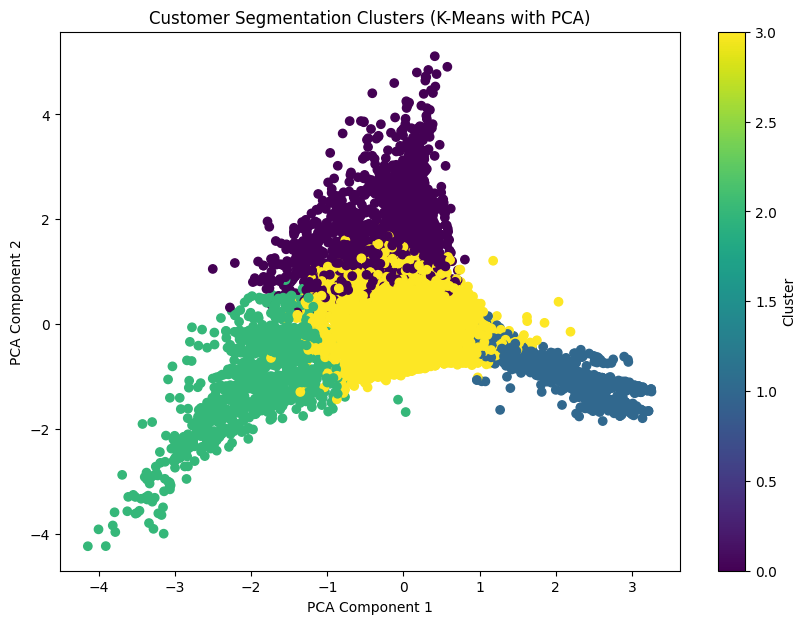

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Extract features for clustering (drop ID and target variable if applicable)
X = df.drop(columns=['ID', 'Segmentation'])  # Dropping ID and target column

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# Add PCA components to the dataframe for visualization
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Visualize the clusters using PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation Clusters (K-Means with PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

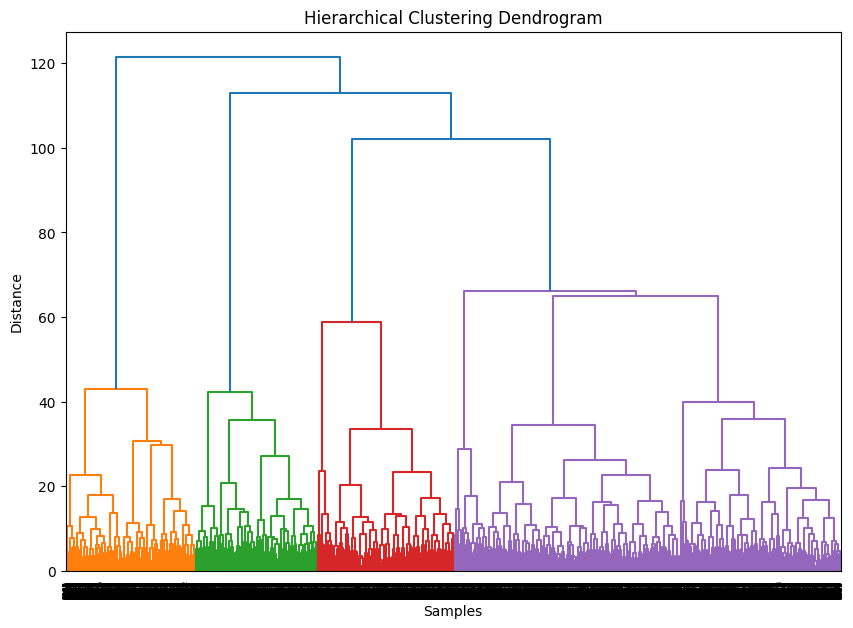

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering using ward linkage
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram to visualize cluster hierarchy
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with specified eps and min_samples parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X)

# Check the number of unique clusters (including noise, which is labeled as -1)
unique_clusters = np.unique(df['Cluster_DBSCAN'])
print(f'Number of clusters detected: {len(unique_clusters)}')


Number of clusters detected: 177


In [ ]:
from sklearn.mixture import GaussianMixture

# Apply GMM
gmm = GaussianMixture(n_components=4, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(X)

# Get the predicted probabilities for each component (soft clustering)
gmm_probs = gmm.predict_proba(X)
print(gmm_probs[:5])  # Show probabilities for the first 5 samples


[[3.95616741e-09 0.00000000e+00 9.99999996e-01 9.80771361e-39]
 [5.15022747e-31 1.00000000e+00 0.00000000e+00 1.53804959e-36]
 [2.79024631e-33 1.00000000e+00 4.47940841e-21 1.79289772e-39]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 7.47674445e-33]
 [4.41659594e-15 1.00000000e+00 0.00000000e+00 5.90584546e-33]]


In [ ]:
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
df['Cluster_Spectral'] = spectral.fit_predict(X)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and test sets
X = df.drop(columns=['ID', 'Segmentation'])
y = df['Segmentation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.4993804213135068
              precision    recall  f1-score   support

           A       0.41      0.39      0.40       597
           B       0.39      0.37      0.38       552
           C       0.53      0.52      0.52       580
           D       0.62      0.68      0.65       692

    accuracy                           0.50      2421
   macro avg       0.49      0.49      0.49      2421
weighted avg       0.49      0.50      0.50      2421



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit a Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predict on the test set
y_pred = gb.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.5307724080958282
              precision    recall  f1-score   support

           A       0.44      0.42      0.43       597
           B       0.42      0.36      0.39       552
           C       0.56      0.57      0.56       580
           D       0.64      0.73      0.68       692

    accuracy                           0.53      2421
   macro avg       0.52      0.52      0.52      2421
weighted avg       0.52      0.53      0.52      2421



# Evaluation

Silhouette Score: -0.11653301751744875


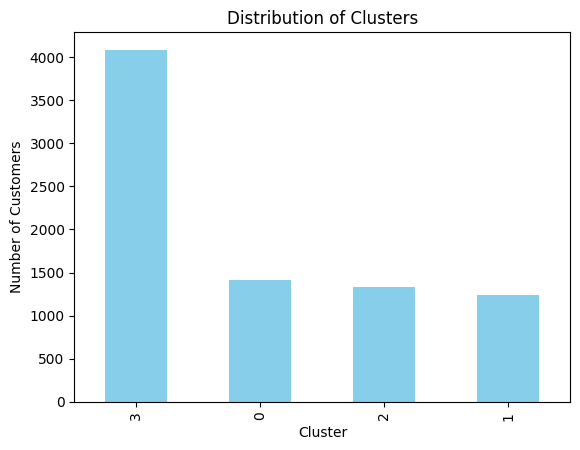

In [ ]:

from sklearn.metrics import silhouette_score

# Calculate silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Visualize the distribution of clusters
df['Cluster'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


# Interpretation and Insights

In [ ]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Calculate the mean of only numeric columns
cluster_means = df.drop(columns=non_numeric_cols).groupby('Cluster').mean()

In [ ]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

Non-numeric columns: Index(['Segmentation'], dtype='object')


In [ ]:
# Convert a column to numeric, forcing errors to NaN
df['Segmentation'] = pd.to_numeric(df['Segmentation'], errors='coerce')

# Alternatively, convert all non-numeric columns to numeric
for column in non_numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
# Handle missing values by imputing or dropping
df.fillna(df.mean(), inplace=True)  # Fill NaN values with the column mean

In [ ]:
# Group by a column and compute the mean of numeric columns
grouped_df = df.groupby('Cluster').mean()
print(grouped_df)

                    ID       Age  Work_Experience  Family_Size  Segmentation  \
Cluster                                                                        
0        463430.545198 -0.509128         1.817073    -0.215402           NaN   
1        463404.510467  1.672691        -0.526376    -0.711334           NaN   
2        463541.616428 -1.042685        -0.392988     1.233069           NaN   
3        463498.536370  0.006634        -0.342327    -0.109673           NaN   

         Gender_Male  Ever_Married_Yes  Graduated_Yes  Profession_Doctor  \
Cluster                                                                    
0           0.475989          0.451271       0.648305           0.097458   
1           0.586957          0.922705       0.669887           0.034622   
2           0.559910          0.128109       0.233610           0.104748   
3           0.556209          0.692628       0.731325           0.090130   

         Profession_Engineer  ...  Var_1_Cat_5  Var_1_Cat_6  V

# Save and Export Reports

In [ ]:
# Save the dataset with clusters
df.to_csv('customer_segmentation_with_clusters.csv', index=False)

# Download the file locally
files.download('customer_segmentation_with_clusters.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>